In [5]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
from tensorflow.keras import backend
import pandas as pd
import eli5
import pickle
#import shap
from lime import lime_text
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
% matplotlib inline
#from pdpbox.pdp import pdp_isolate, pdp_plot,pdp_interact_plot
#from pdpbox import info_plots, get_dataset

UsageError: Line magic function `%` not found.


{'.net': 0,
 'android': 1,
 'asp.net': 2,
 'c': 3,
 'c#': 4,
 'c++': 5,
 'css': 6,
 'html': 7,
 'ios': 8,
 'iphone': 9,
 'java': 10,
 'javascript': 11,
 'jquery': 12,
 'mysql': 13,
 'objective-c': 14,
 'other': 15,
 'php': 16,
 'python': 17,
 'ruby-on-rails': 18,
 'sql': 19}

In [6]:
with open("feature_importance.txt", "rb") as fp:   # Unpickling
    feature_names = pickle.load(fp)

In [7]:
model_rf = pickle.load(open('RF_model', 'rb'))
#result = loaded_model.score(X_test, Y_test)

In [8]:
df_train=pd.read_csv("dataframe_train.csv",index_col=0)
df_test=pd.read_csv("dataframe_test.csv",index_col=0)

In [10]:
df_train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,tag_javascript,tag_jquery,tag_mysql,tag_objective-c,tag_other,tag_php,tag_python,tag_ruby-on-rails,tag_sql,maintag
0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,16
1,0.0,0.000000,0.0,0.0,0.088881,0.075157,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,11
2,0.0,0.155549,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,15
3,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,15
4,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,11


In [11]:
feature_names(list(mydict.items())[0:5])

In [12]:
label_col = [col for col in df_test if col.startswith('tag_')]

In [13]:
train_features=df_train.drop(label_col+['maintag'],axis=1)
y_train=df_train['maintag']
y_train_one_hot=df_train[label_col]
test_features=df_test.drop(label_col+['maintag'],axis=1)
y_test=df_test['maintag']
y_test_one_hot=df_test[label_col]

In [14]:
class_names = [y_train.unique()]
print(class_names)
print(type(class_names))
print(type(class_names[0]))
xyz = list(class_names[0])
print(xyz)
xyz = list(map(str,xyz))
print(xyz)
print(','.join(xyz))

[array([16, 11, 15,  4, 12,  1,  3, 10, 19, 17, 13,  5,  8,  7,  0, 18,  6,
       14,  2,  9])]
<class 'list'>
<class 'numpy.ndarray'>
[16, 11, 15, 4, 12, 1, 3, 10, 19, 17, 13, 5, 8, 7, 0, 18, 6, 14, 2, 9]
['16', '11', '15', '4', '12', '1', '3', '10', '19', '17', '13', '5', '8', '7', '0', '18', '6', '14', '2', '9']
16,11,15,4,12,1,3,10,19,17,13,5,8,7,0,18,6,14,2,9


# Visual representation of feature importance

In [15]:
eli5.show_weights(model_rf)

Weight,Feature
0.0255 ± 0.0144,x335
0.0252 ± 0.0115,x15
0.0223 ± 0.0119,x228
0.0197 ± 0.0105,x364
0.0137 ± 0.0101,x230
0.0103 ± 0.0067,x232
0.0102 ± 0.0025,x64
0.0092 ± 0.0073,x479
0.0089 ± 0.0050,x159
0.0087 ± 0.0042,x300


In [16]:
eli5.explain_weights_df(model_rf).head(5)

,feature,weight,std
0,x335,0.025541,0.007193
1,x15,0.025175,0.005734
2,x228,0.022329,0.005928
3,x364,0.019716,0.005269
4,x230,0.013662,0.005073


In [17]:
eli5.explain_prediction_df(model_rf,train_features.iloc[[0]],top_targets=2).head(5)

,target,feature,weight,value
0,16,x335,0.220436,0.078074
1,16,x278,0.180808,0.105783
2,16,x122,0.151977,0.047941
3,16,<BIAS>,0.071675,1.000000
4,16,x28,0.049389,0.038499


In [18]:
# Making a dataframe with information regarding feature importance given by the model for all the test features to get their target.
df_target=pd.DataFrame()
for i in range(500):
    fea_imp=eli5.explain_prediction_df(model_rf,test_features.iloc[[i]],top_targets=1)
    df_target=df_target.append(fea_imp)

In [22]:
#checking for target=17 i.e. python
df_17=df_target[df_target['target']==17]

In [23]:
df_17_mean=df_17.groupby(['feature'])[['weight']].mean().reset_index().sort_values(by=['weight'],ascending=False)
df_17_mean.head(5)

,feature,weight
296,x364,0.344661
6,x102,0.049938
0,<BIAS>,0.048944
122,x207,0.042416
278,x348,0.028400


In [29]:
dict={}
for i in range(500):
    dict.update( {'x'+str(feature_names[i][0]):feature_names[i][1][0]} )

In [30]:
df_17_mean['feature']=df_17_mean['feature'].map(dict) 

In [31]:
df_17_mean.head(5)

,feature,weight
296,python,0.344661
6,def,0.049938
0,NaN,0.048944
122,import,0.042416
278,print,0.028400


In [32]:
df_17_mean.loc[df_17_mean['feature'].isnull()]

,feature,weight
0,NaN,0.048944
447,NaN,0.001918
449,NaN,0.000014
448,NaN,-0.000050


In [33]:
df_17_mean.at[0, 'feature']='bias'
df_17_mean.at[449,'feature']='ques_score_good'
df_17_mean.at[448,'feature']='ques_score_medium'
df_17_mean.at[447,'feature']='ques_score_bad'

In [34]:
df_17_dict=df_17_mean.set_index('feature').T.to_dict('int')

#dictionary containing features and their mean importance as calculated by eli5
df_17_dict['weight'] looks like this: 
<img src="dict_weight.png">

In [36]:
with open("df_17_dict.txt", "wb") as fp:   # Pickling
    pickle.dump(df_17_dict['weight'],fp)

In [37]:
with open("df_17_dict.txt", "rb") as fp:   # Unpickling
    dict_17 = pickle.load(fp)

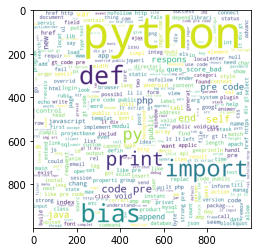

In [38]:
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=500,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(dict_17)
plt.imshow(wc)

/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


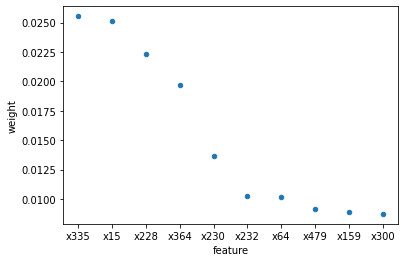

In [24]:
feature_imp=(eli5.explain_weights_df(model_rf)).head(10)
feature_imp.plot(x ='feature', y='weight', kind = 'scatter')
plt.show()

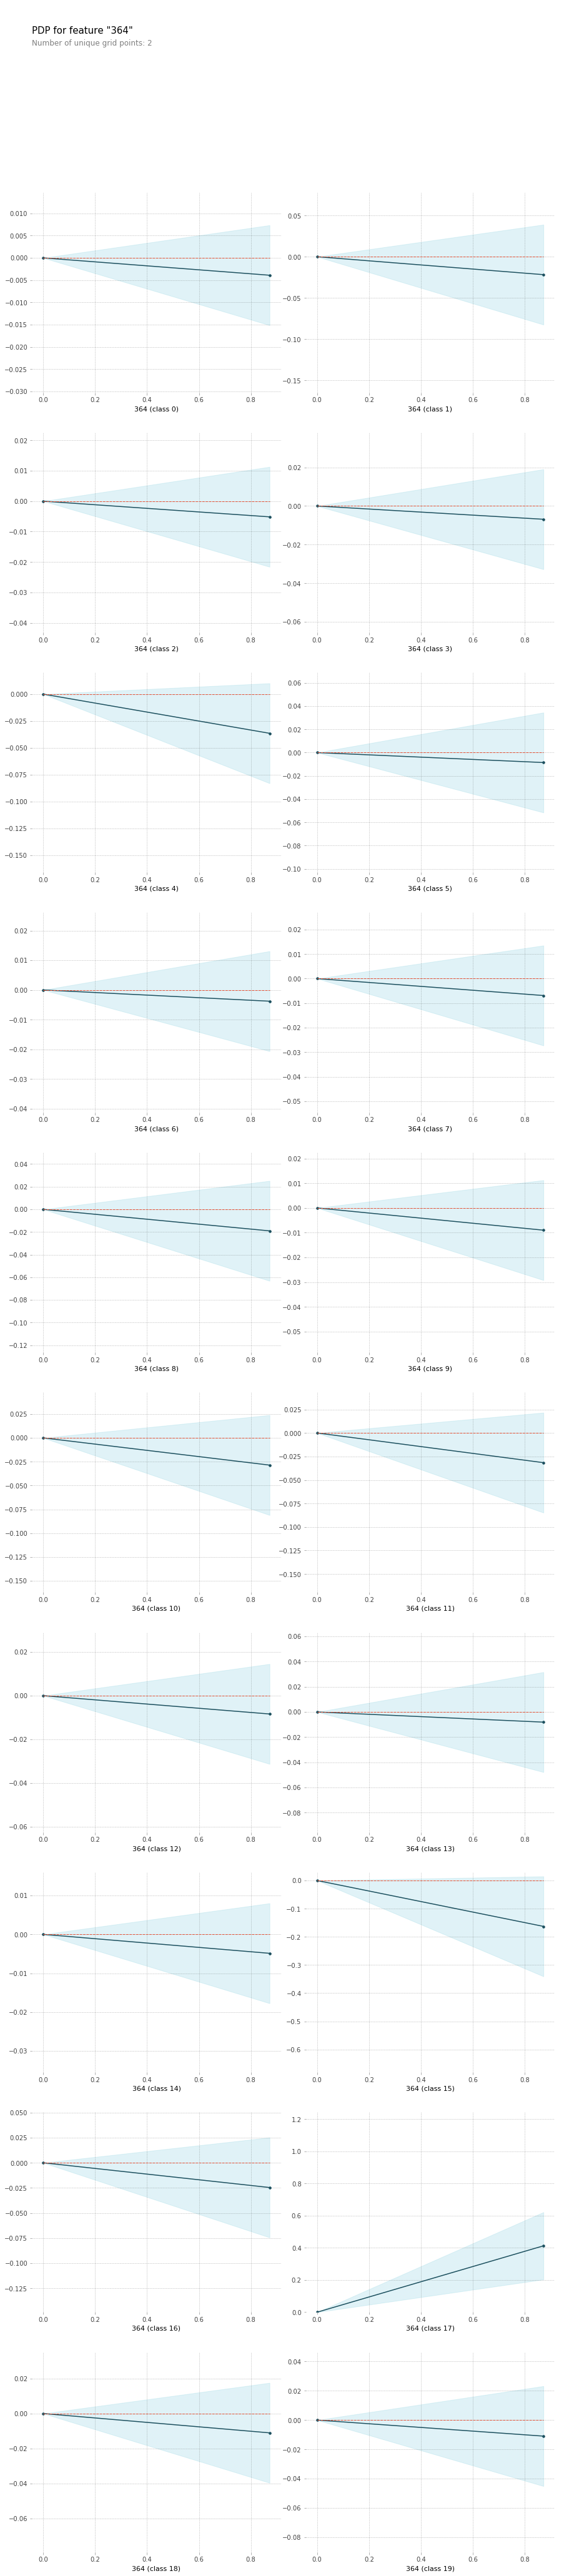

In [11]:
feature = '364'
isolated = pdp_isolate(
 model=model_rf,
 dataset=test_features,
 model_features=[str(i) for i in range(503)],
 feature=feature
)
pdp_plot(isolated, feature_name=feature);

In [ ]:
# for i in range(train_features.shape[0]):


#     aux1 = eli5.sklearn.explain_prediction.explain_prediction_tree_classifier(model_rf,train_features[i], top=15)
#     aux1 = eli5.format_as_dataframe(aux1)

#     if 'aux_total'  in locals() and 'aux_total' in  globals():
#         aux_total = concat_average_dfs(aux1,aux_total)
#     else:
#         aux_total = aux1

In [ ]:
# data_for_prediction = test_features[test_features==97]
# shap.initjs()
# explainer = shap.TreeExplainer(model_rf)
# shap_values = explainer.shap_values(data_for_prediction)
# shap.force_plot(explainer.expected_value, shap_values, data_for_prediction)

In [ ]:
# info_plots.target_plot(df_train.as_matrix(), feature=220, feature_name=220, target=y_train_one_hot.as_matrix(), num_grid_points=10, grid_type='percentile', percentile_range=None, grid_range=None, cust_grid_points=None, show_percentile=False, show_outliers=False, endpoint=True, figsize=None, ncols=2, plot_params=None)

In [ ]:
# c = make_pipeline(tfidf_text, model_2)

In [ ]:
# from lime.lime_text import LimeTextExplainer
# explainer = LimeTextExplainer(class_names=class_names)
# idx = 20
# exp = explainer.explain_instance(test_features.iloc[idx], c.predict_proba, num_features=4, labels=[0, 2])
# print('Document id: %d' % idx)
# print('Predicted class =', class_names[nb.predict(test_features[idx]).reshape(1,-1)[0,0]])
# print('True class: %s' % class_names[y_test[idx]])